**Exercise #3: Unconstrained Growth**

Name: Miguel Carlo S. Yapan\
ID: 205501\
Date: 02-22-22

We first import numpy and matplotlib to our notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, we set the variables for our given initial conditions. The variables and their description are listed below:

- init_pop: the given initial population with a value of 100.000000
- growth_rate: the continuous growth rate given at 10% per hour
- dt: the time step delta t defined to be 0.005 hours

In [2]:
init_pop = 100.000000
growth_rate = 0.10
dt = 0.005

Now we initialize lists for two variables: t for time and pop for the population at time t. We don't have to put the 0 value for t because we will use a loop in generating our time step values starting at 0. Meanwhile, we put init_pop as the first entry in our pop list.

In [3]:
t = []
pop = [init_pop]

The following code generates our time step values, and then shows how much time steps we have. 

In [4]:
for i in np.arange(0.000, 20.000+0.005, 0.005):
    t.append(i)
len(t)

4001

Just for a sanity check, we verify that the last entry in our list t is indeed 20.000, as intended.

In [5]:
t[-1]

20.0

We now iterate the difference equation over the variables to get the population values at different times. We round the value for each iteration for up to six decimal places. Note that the indexes of the two lists t and pop represent one row in our table. Comments on the code block describe the variables.

In [6]:
#We start with index 1 because index 0 is our base case.
for i in range(1, len(t)):
    pop.append(round(pop[i-1]+(pop[i-1]*growth_rate)*dt,6))
#Since there is an initial population value, we only append in the list starting from the second index 1
#pop[i-1] refers to the population from the previous time step. 
#pop[i-1]*growth_rate refers to growth. This is the product of the population from the previous time step and the 10% growth rate.

We check if we have the same number of entries in the population list pop and the time list t.

In [7]:
len(pop)

4001

To verify that the values for the population and time are accurate, we check the first few elements in the two lists to see if it is the same as the table in our example.

In [8]:
pop[:15]

[100.0,
 100.05,
 100.100025,
 100.150075,
 100.20015,
 100.25025,
 100.300375,
 100.350525,
 100.4007,
 100.4509,
 100.501125,
 100.551376,
 100.601652,
 100.651953,
 100.702279]

In [9]:
t[:15]

[0.0,
 0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.03,
 0.035,
 0.04,
 0.045,
 0.05,
 0.055,
 0.06,
 0.065,
 0.07]

We are now sure that the population and time both have 4001 entries and that the values for the first few rows of our table match with the example. To find out the population at t=0.050h and t=20.000h, we need to find the index of these times at t and then return the same index for the pop list.

In [10]:
pop[t.index(0.050)]

100.501125

In [11]:
pop[t.index(20.000)]

738.536294

We see that the population at t=0.050h is 100.501125 while the population at t=20.000h is 738.536294.

The following block plots the estimated population vs time graph from t=0.000h to t=20.000h. 

Text(0.5, 1.0, 'Estimated population from 0h to 20h')

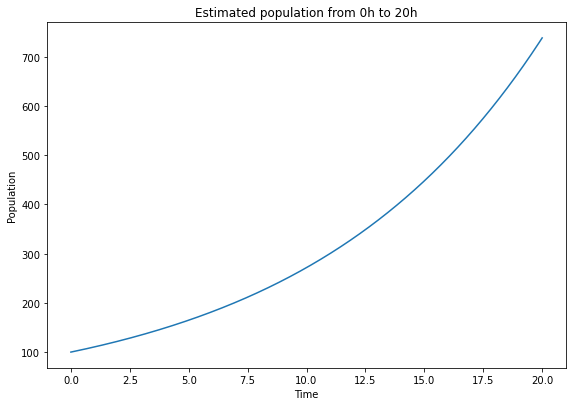

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.plot(t, pop)
ax.set_ylabel('Population')
ax.set_xlabel('Time')
ax.set_title('Estimated population from 0h to 20h')

Upon observation of the generated graph, we notice that the population is exponentially increasing through time. The Difference Equation we used only adds to the base population and there are no limiting variables that subtract from the model. In other words, there is an inflow but no outflow. As such, we expect the population to continually increase.

Knowing that the graph was derived from an Unconstrained Growth model, it makes sense that there are no restrictions on the rapid rise of the population, since the name of the model itself says that it is "unconstrained". Normally, we would consider the amount of resources and space that a particular subject such as bacteria consume, but the model only took growth at certain time intervals as variables. To provide a more accurate prediction, we could add a decay variable in our equation in which we subtract part of the population in the previous time interval. This could be taken from statistics that show mortality rate. Finally, I think that this model is good for small periods of time, wherein decay factors or outflows do not have an immediate effect on the subject. 

The following block defines a function that summarizes the process of plotting a population vs time graph that we have done thus far. The next two blocks show the population at time t=30h and t=10h. From observation, we notice that the increase from 10h to 20h is ~470 while the increase from 20h to 30h is ~1260. Even if they have the same time intervals, since the difference equation grows based on the previous population, the increase in the latter interval is almost threefold than the other one. This further shows the exponential nature of the model.

In [13]:
def unconstrained_growth(initial_pop, growth_rate, delta_t, final_t, x_label, y_label, graph_title):
    time = []
    population = [initial_pop]
    for i in np.arange(0, final_t+delta_t, delta_t):
        time.append(i)
    for i in range(1,len(time)):
        population.append(round(population[i-1]+(population[i-1]*growth_rate)*delta_t,6))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1.2,1.2])
    ax.plot(time, population)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(graph_title)

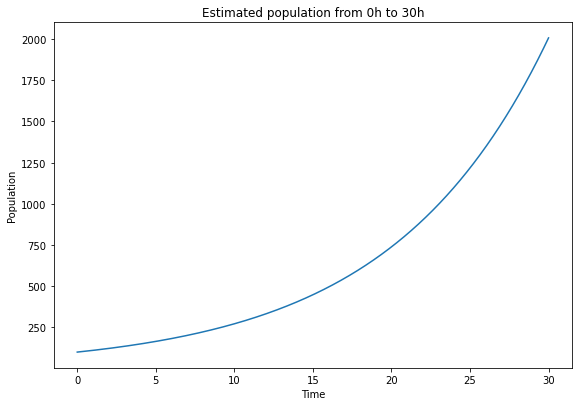

In [14]:
unconstrained_growth(100, 0.1, 0.005, 30, 'Time', 'Population', 'Estimated population from 0h to 30h')

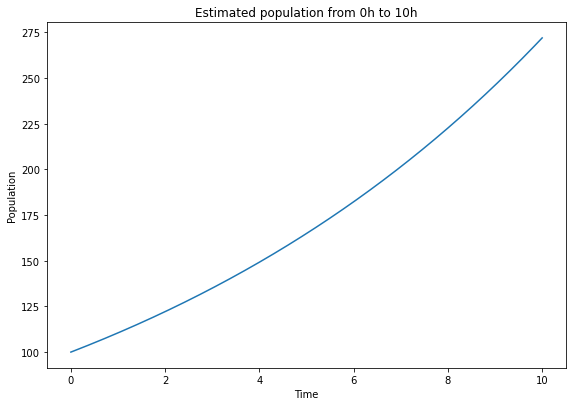

In [15]:
unconstrained_growth(100, 0.1, 0.005, 10, 'Time', 'Population', 'Estimated population from 0h to 10h')